In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

## Working in relative coordinates for particles 1 and 2:
## (This makes PN corrections easier later)
### $\mathbf{a} = \mathbf{a}_1 - \mathbf{a}_2$
### $\mathbf{r} = \mathbf{r}_1 - \mathbf{r}_2=(r_x,r_y)$
### $\mathbf{n} = \mathbf{r}/r = \mathbf{n}_{12} = -\mathbf{n}_{21}$


## EOM:
### $\mathbf{a} = \mathbf{r}''(t) = -\frac{ G m }{r^2 (t)} \mathbf{n}(t)$, with $m = M_1  + M_2$
### $r_x''(t) = -\frac{ G m }{(r_x^2 + r_y^2)^{3/2}} r_x $ and $r_y''(t) = -\frac{ G m }{(r_x^2 + r_y^2)^{3/2}} r_y $

## For Python : $y = r_x, r_y, r_x', r_y' =r_x, r_y, v_x, v_y$

In [2]:
def relative_a_component(r_x, r_y, Gm):
    return -Gm*r_x* ((r_x*r_x +r_y*r_y)**(-1.5))

def relative_dynamics(y,t,Gm):
    r_x, r_y, v_x, v_y = y
    dydt = [v_x, v_y, relative_a_component(r_x, r_y, Gm), relative_a_component(r_y, r_x, Gm)]
    return dydt

In [3]:
y0 = [-1, 1, .1, 0.5]
Gm_val = 1
t = np.linspace(0, 10, 201)

In [4]:
sol = odeint(relative_dynamics, y0, t, args=(Gm_val,))

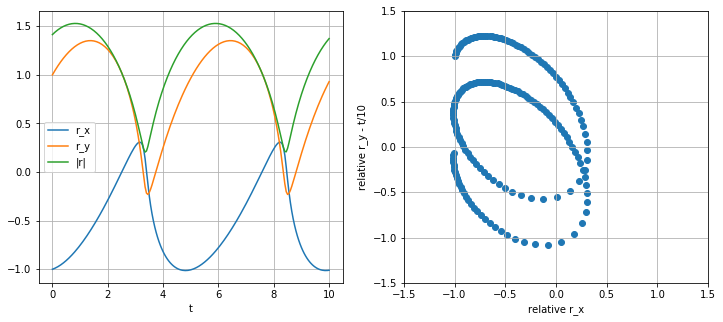

In [5]:
_ = plt.figure(figsize=(12,5)), plt.subplot(1,2,1)
_ = plt.plot(t, sol[:, 0], label='r_x')
_ = plt.plot(t, sol[:, 1], label='r_y')
_ = plt.plot(t, np.sqrt(sol[:, 0]**2.+sol[:, 1]**2.), label='|r|')
_ = plt.legend(loc='best'), plt.xlabel('t'), plt.grid()
_ = plt.subplot(1,2,2), plt.ylim(-1.5,1.5), plt.xlim(-1.5,1.5)
_ = plt.scatter(sol[:, 0], sol[:, 1] - t/10.)
_ = plt.ylabel('relative r_y - t/10'), plt.xlabel('relative r_x'), plt.grid()

## Fix absolute (not relative) coordinate system 
## (Assume Newtonian centre of mass - drop $c^{-2}$ terms)
## $R_{COM} = \frac{M_1 {\mathbf{r}}_1 + M_2 {\mathbf{r}}_2 }{M_1 + M_2}  = 0$
## $\mathbf{r}_1  = \frac{M_2  \mathbf{r}}{M_1 + M_2}$

In [6]:
def newtonian_r_components(r_relative, mass1, mass2):
    specific_r_relative = r_relative / (mass1 + mass2)
    return specific_r_relative * mass2, -specific_r_relative * mass1

In [7]:
r_relative = np.array([sol[:, 0], sol[:, 1]])

r_x_absolute = newtonian_r_components(r_relative=r_relative[0], mass1=2., mass2=1.)

r_y_absolute = newtonian_r_components(r_relative=r_relative[1], mass1=2., mass2=1.)

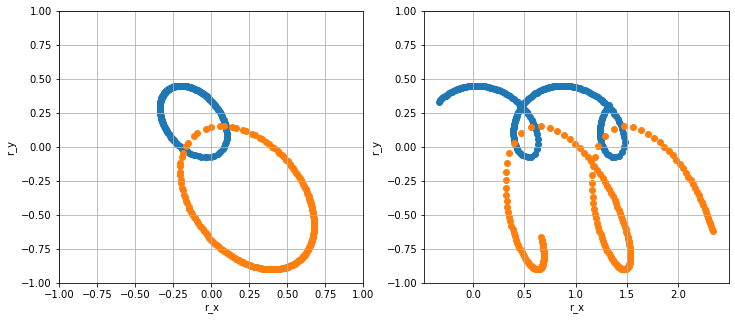

In [8]:
_ = plt.figure(figsize=(12,5)), plt.subplot(1,2,1)
_ = plt.scatter(r_x_absolute[0], r_y_absolute[0] )
_ = plt.scatter(r_x_absolute[1], r_y_absolute[1] )
_ = plt.xlim(-1,1), plt.ylim(-1,1)
_ = plt.ylabel('r_y'), plt.xlabel('r_x'), plt.grid()
_ = plt.subplot(1,2,2)
_ = plt.scatter(r_x_absolute[0] + t/6., r_y_absolute[0] )
_ = plt.scatter(r_x_absolute[1]+ t/6., r_y_absolute[1] )
_ = plt.ylim(-1,1)
_ = plt.ylabel('r_y'), plt.xlabel('r_x'), plt.grid()